In [1]:
"""
Interactive example of four coordinate systems in matplotlib

Created by Zion Yang (May 2020) based on 
https://matplotlib.org/tutorials/advanced/transforms_tutorial.html
"""

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
def add_interactivity(fig):
    """
    Action: Show an interactive matplotlib figure with the current backend
    when mouse click, draw text of coordinates of the clicked point

    https://matplotlib.org/users/event_handling.html
    """
    
    display_coords = plt.text(0.04, 0.95, 'No display', transform=fig.transFigure)
    figure_coords = plt.text(0.29, 0.95, 'No figure', transform=fig.transFigure)
    axes_coords = plt.text(0.54, 0.95, 'No axes', transform=fig.transFigure)
    data_coords = plt.text(0.79, 0.95, 'No data', transform=fig.transFigure)
    
    fig.add_artist(figure_coords)
    fig.add_artist(axes_coords)
    fig.add_artist(data_coords)
    fig.add_artist(display_coords)
    
    cur_axes = None
    
    # define mouse events
    def enter_axes(event):
        """ mouse enter subplot event """
        
        nonlocal cur_axes
        cur_axes = event.inaxes
        event.inaxes.patch.set_facecolor('yellow')
        event.canvas.draw_idle()

    def leave_axes(event):
        """ mouse leave subplot event """

        nonlocal cur_axes
        cur_axes = None
        event.inaxes.patch.set_facecolor('white')
        event.canvas.draw()

    def onclick(event):
        """ mouse click subplot event """
        
        display_x, display_y = event.x, event.y
        figure_x, figure_y = fig.transFigure.inverted().transform((display_x, display_y))
        figure_coords.set_text(f'figure = ({figure_x:.2f}, {figure_y:.2f})')
        display_coords.set_text(f'display = ({display_x}, {display_y})')
        
        data_x, data_y = event.xdata, event.ydata
        if cur_axes is not None:
            axes_x, axes_y = cur_axes.transAxes.inverted().transform((display_x, display_y))
            axes_coords.set_text(f'axes = ({axes_x:.2f}, {axes_y:.2f})')
            data_coords.set_text(f'data = ({data_x:.2f}, {data_y:.2f})')
        else:
            axes_coords.set_text(f'No axes')
            data_coords.set_text(f'No data')
        
    # register event handlers
    fig.canvas.mpl_connect('button_press_event', onclick)
    fig.canvas.mpl_connect('axes_enter_event', enter_axes)
    fig.canvas.mpl_connect('axes_leave_event', leave_axes)
    
    return fig

In [3]:
def example_fig(name):
    """ 
    example static figure of grid of subplots with subplot having different aspect ratio
    """

    fig = plt.figure(name, figsize=(7.2, 4.8))
    fig.patch.set_facecolor('xkcd:mint green')
    fig.add_artist(patches.Rectangle(xy=(0,0),width=1,height=1,
                                     linewidth=1,edgecolor='black', facecolor='None', transform=fig.transFigure))
    
    # define data for scatter plot
    np.random.seed(2)
    x_data = np.random.rand(100)
    y_data = 2 * np.random.rand(100)
    
    # plot data and a scaled version
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(x_data, y_data, 'o')
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(2 * x_data,  3 * y_data, 'o')
    
    return fig

<IPython.core.display.Javascript object>


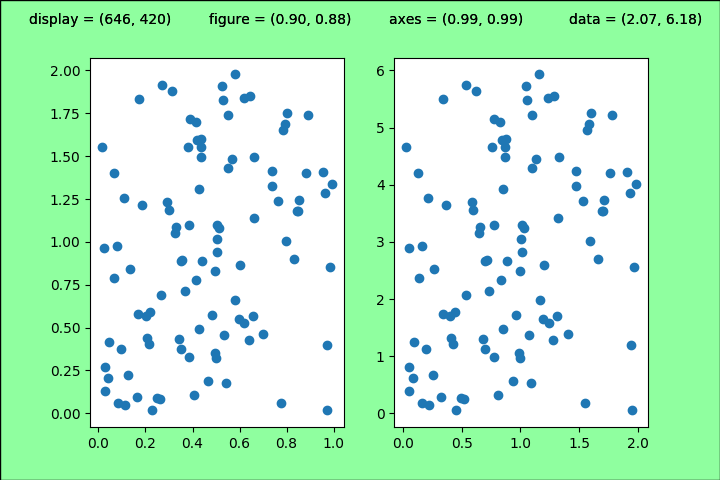

In [4]:
%matplotlib notebook
add_interactivity(example_fig('Coordinates of the clicked point')).show()